## 1) BeuatifulSoup로 스크레이핑하기

### 1-3) BeautifulSoup 기본 사용법

In [38]:
# 라이브러리 읽어 들이기 ---(※1) : BeautifulSoup 라이브러리를 읽어 들임.
from bs4 import BeautifulSoup

# 분석하고 싶은 HTML ---(※2) : 분석 대상 HTML 지정
html = """
<html><body>
    <h1>스크레이핑이란?</h1>
    <p>웹 페이지를 분석하는 것</p>
    <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

#HTML 분석하기 ---(※3) : BeautifulSoup 인스턴스를 생성, 
soup = BeautifulSoup(html, 'html.parser') #첫 번째 매개변수에 html 지정, 두 번째 매개변수에 분석할 분석기(parser)의 종류 지정

# 원하는 부분 추출하기 ---(※4) : 원하는 부분을 추출 (정상적으로 PARSER가 되면 HTML구조 처럼 루트 요소인 <html>에서 마침표를 사용해야한다.)
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling # next_soibling을 사용하여 첫번째 </p> 뒤에 있는 줄바꿈 또는 공백이 추출된다. 따라서 두 번 사용

# 요소의 글자 출력하기 ---(※5) : string 속성에 접근해서 요소의 글자 부분을 추출
print("h1 = " + h1.string)
print("p = " + p1.string)
print("p = " + p2.string)

h1 = 스크레이핑이란?
p = 웹 페이지를 분석하는 것
p = 원하는 부분을 추출하는 것


### 2-1) id로 요소를 찾는 방법
    html구조를 하나하나 적어나가는 것은 귀찮고 복잡하기 때문에 간단하게 요소를 찾기 위해 사용함.

In [39]:
from bs4 import BeautifulSoup

html = """
<html><body>
    <h1 id="title">스크레이핑이란?</h1>
    <p id="body">웹 페이지를 분석하는 것</p>
    <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

# HTML 분석하기 ---(※1) : BeautifulSoup 인스턴스를 생성
soup = BeautifulSoup(html, 'html.parser') # 첫 번째 매개변수에 분석하고 싶은 html 지정 두 번째 매개변수에는 분석할 분석기(parser)

# find() 메서드로 원하는 부분 추출하기 ---(※2) : id를 지정해 요소를 추출
title = soup.find(id="title") # find() 메서드에 "id=<값>"형태로 매개변수를 지정
body = soup.find(id="body")

# 텍스트 부분 출력하기
print("#title=" + title.string)
print("#body=" + body.string)

#title=스크레이핑이란?
#body=웹 페이지를 분석하는 것


### 2-2) 여러 개의 요소 추출하기 - find_all()메서드

    여러 개의 태그를 한 번에 추출하고 싶을 때는 find_all() 메서드를 사용한다.
        ·<a> 태그 추출
        ·하이퍼링크 태그
        ·href 속성으로 지정

In [40]:
from bs4 import BeautifulSoup
html = """
<html><body>
<u1>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
</u1>
</body></html>
"""

# HTML 분석하기 ---(※1) HTML을 지정해 BeautifulSoup 인스턴스를 생성
soup = BeautifulSoup(html, 'html.parser')

# find_all() 메서드로 추출하기 ---(※2) find_all 메서드를 사용해 모든 <a>태그를 추출
links = soup.find_all("a")

# 링크 목록 출력하기 ---(※3) 추출한 모든 요소를 for 구문으로 반복 처리
for a in links:
    href = a.attrs['href'] #href 속성은 attrs['href]처럼 attrs속성에서 추출
    text = a.string
    print(text, ">", href)

naver > http://www.naver.com
daum > http://www.daum.net


In [41]:
links

[<a href="http://www.naver.com">naver</a>,
 <a href="http://www.daum.net">daum</a>]

### 2-3) DOM 요소의 속성에 대해

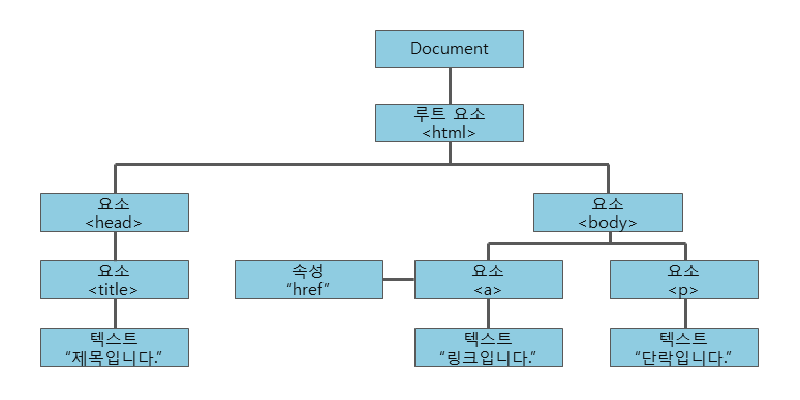

In [42]:
from PIL import Image
img = Image.open('img_DOM.png') # 이미지 불러오기
img = img.resize((800,400))
img


### 3-1) urlopen()과 BeautifuSoup 조합하기

In [43]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

# urlopen()으로 데이터 가져오기 ---(※1) : urlopen()으로 URL을 열기.
res = req.urlopen(url)

# BeautifulSoup으로 분석하기 ---(※2) : BeautifuSoup으로 분석
soup = BeautifulSoup(res, "html.parser")

#원하는 데이터 추출하기 ---(※3) : 원하는 태그를 추출하고 결과를 출력
title = soup.find("title").string
wf = soup.find("wf").string
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 15일(금)은 중부지방(강원영동 제외)과 전라권에 비 또는 눈이 오겠고, 전라권은 16일(토)까지 이어지겠습니다. 22일(금)은 남부지방과 제주도에 비가 오겠습니다. <br />○ (기온) 15일(금)의 아침 기온은 -6~8도, 낮 기온은 6~15도로 오늘(아침 기온 -15~-3도, 낮 기온 -3~6도)보다 높겠습니다.<br />          한편, 16일(토)~18일(월)의 아침 기온은 -16~3도, 낮 기온은 -3~8도로 평년(아침 기온 -10~0도, 낮 기온 1~8도)보다 낮아 춥겠고, <br />          19일(화)~22일(금)의 아침 기온은 -9~6도, 낮 기온은 2~11도로 평년과 비슷하거나 조금 높겠습니다.      <br />○ (해상) 16일(토)~17일(일)은 대부분 해상에서 바람이 매우 강하게 불고, 물결이 2.0~4.0m로 매우 높게 일겠습니다.<br />○ (주말전망) 16일(토) 오전에 전라권에 눈이 오겠고, 강원영동을 제외한 그 밖의 지역은 구름이 많겠습니다. 17일(일) 대체로 맑겠으나, 전라권은 구름많겠습니다. <br />              아침 기온은 -16~3도, 낮 기온은 -3~6도의 분포가 되겠습니다. 특히, 17일(일) 아침 기온은 전국 대부분 지역이 -5도 이하(중부지방 -10도 내외)로 떨어져 춥겠습니다.


    : RSS에서 XML 데이터를 추출하고 XML의 내용을 출력

### 3-2) CSS 선택자 사용하기


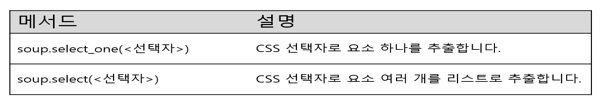

In [44]:
from PIL import Image
img = Image.open('css.jpg') # 이미지 불러오기
img = img.resize((600,100))
img

In [47]:
from bs4 import BeautifulSoup

# 분석 대상 HTML ---(※1)
html = """
<html><body>
<div id = "meigen">
<h1> 위키북스 도서 </h1>
    <ul class = "items">
        <li> 유니티 게임 이팩트 입문 </li>
        <li> 스위프트로 시작하는 아이폰 앱 개발 교과서 </li>
        <li> 모던 웹사이트 디자인의 정석 </li>
    </ul>
</div>
</body></html>
"""

# HTML 분석하기 ---(※2)
soup = BeautifulSoup(html, 'html.parser')

# 필요한 부분을 CSS 쿼리로 추출하기
# 타이틀 부분 추출하기 ---(※3)
h1 = soup.select_one("div#meigen > h1").string
print("h1=", h1)

# 목록 부분 추출하기 ---(※4)
li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
    print("li=",li.string)

h1=  위키북스 도서 
